<a href="https://colab.research.google.com/github/maheravi/Deep-Learning/blob/main/Pix2Pix/inference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras.models import load_model
import os
import pathlib
import time
import datetime
import cv2
import os
import numpy as np

from matplotlib import pyplot as plt
from IPython import display
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
model = load_model('/content/drive/MyDrive/DeepLearning/pix2pix/facades.h5')

In [5]:
input_image = tf.data.Dataset.list_files(str('/content/Input/*.jpg'))
#target = tf.data.Dataset.list_files(str('/content/Target/*.jpg'))

In [6]:
IMG_WIDTH = 256
IMG_HEIGHT = 256

In [7]:
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = tf.io.read_file('Input/3.jpg')
        img = tf.image.decode_jpeg(img)
        img = tf.cast(img, tf.float32)
        img = (img / 127.5) - 1
        if img is not None:
            images.append(img)
    return images

In [8]:
input = load_images_from_folder('Input')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


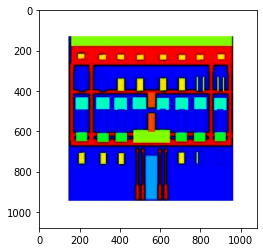

In [9]:
plt.imshow(input[0])

In [10]:
predict = []
for image in input:
  image = tf.image.resize(image, [IMG_HEIGHT, IMG_WIDTH],
                                method=tf.image.ResizeMethod.NEAREST_NEIGHBOR)
  # image = tf.image.convert_image_dtype(image, dtype=tf.float32, saturate=False, name=None)
  image = np.expand_dims(image, axis=0)
  prediction = model(image, training=True)
  predict.append(prediction)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


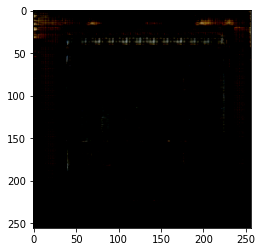

In [11]:
plt.imshow(prediction[0])